In [146]:
## importing python liabraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [147]:
## extract data and load
data=pd.read_csv(r'C:\Users\pv11379\OneDrive - Deere & Co\Desktop\Personal folder\Data science\Database/delivery_time.csv')

In [148]:
## copy the data
df=data.copy()

# understanding data

In [149]:
df.head(2) ## top 2 rows of dataset

,Delivery Time,Sorting Time
0,21.0,10
1,13.5,4


In [150]:
df.tail(2) ## bottom 2 rows of dataset

,Delivery Time,Sorting Time
19,17.83,7
20,21.50,5


In [151]:
## shape of data
print("total rows in data is - ",df.shape[0])
print("total columns in data is - ", df.shape[1])

total rows in data is -  21
total columns in data is -  2


In [152]:
df.info() ## data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [153]:
## inference - 21 rows and 2 columns. delivery time is float data type and sorting time is integer data type.

In [154]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [155]:
df.isna().any()

Delivery Time    False
Sorting Time     False
dtype: bool

In [156]:
## No any null values in dataset

In [157]:
df.index

RangeIndex(start=0, stop=21, step=1)

In [158]:
df.columns ## columns in dataset

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [159]:
df.describe() ## statistical details of dataset

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [160]:
## inference - no more gap in min and max data. so variation is less. STD is also low.

In [161]:
df.nunique() ## number of unique values in columns 

Delivery Time    21
Sorting Time      9
dtype: int64

# cheking of outliers in dataset

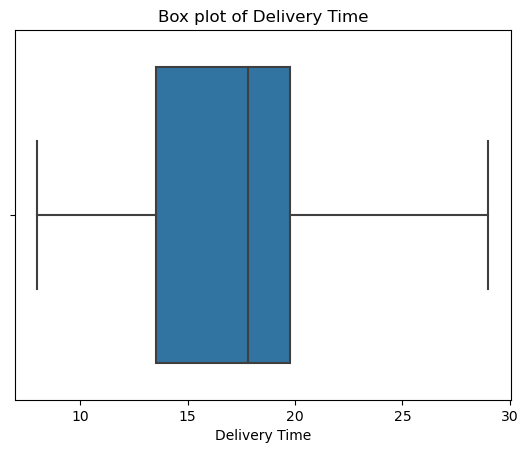

In [162]:

sns.boxplot(x=df['Delivery Time'])
plt.title("Box plot of Delivery Time")
plt.show()

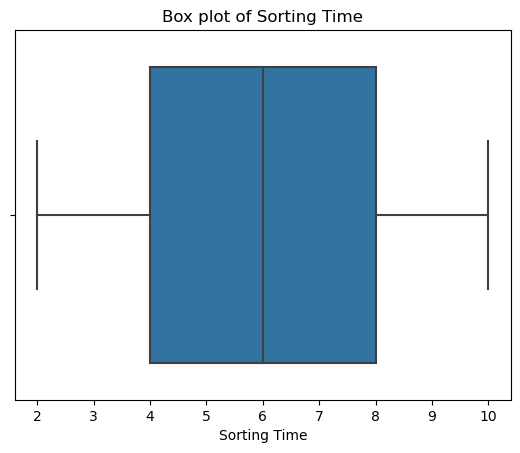

In [163]:
sns.boxplot(x=df['Sorting Time'])
plt.title("Box plot of Sorting Time")
plt.show()

In [164]:
## inference - No outliers in dataset.

In [165]:
## correlation in dataset
corr= df.corr()
corr

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


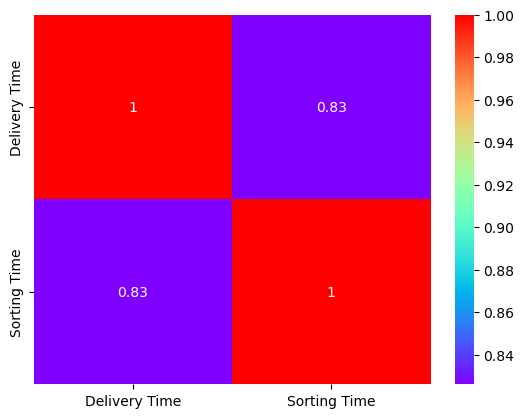

In [166]:
sns.heatmap(corr,annot=True,cmap='rainbow')
plt.show()

In [167]:
## inference - correlation co-efficient is more, so they have strong correlation with each other.

# exploratory data analysis

In [168]:
## average delivery time
print("Average delivery time is - ",round(df['Delivery Time'].mean(),0))

Average delivery time is -  17.0


In [169]:
## Max delivery time
print("Max delivery time is - ",round(df['Delivery Time'].max(),0))

Max delivery time is -  29.0


In [170]:
## Min delivery time
print("Min delivery time is - ",round(df['Delivery Time'].min(),0))

Min delivery time is -  8.0


In [171]:
## Max sorting time
print("Max sorting time is - ",round(df['Sorting Time'].max(),0))

Max sorting time is -  10


In [172]:
## Min sorting time
print("Min sorting time is - ",round(df['Sorting Time'].min(),0))

Min sorting time is -  2


In [173]:
## average sorting time
print("Average sorting time is - ",round(df['Sorting Time'].mean(),0))

Average sorting time is -  6.0


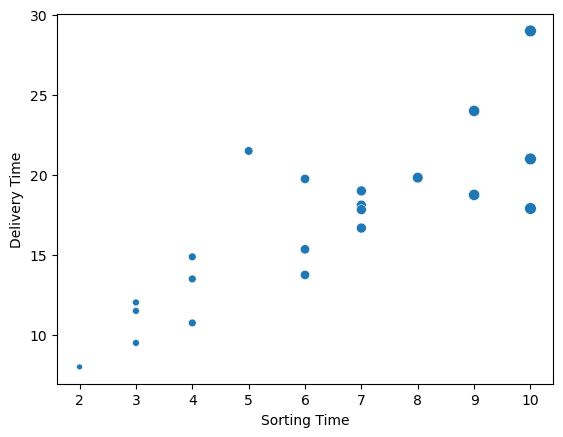

In [174]:
sns.scatterplot(data=df,y='Delivery Time',x='Sorting Time',markers='o',size='Sorting Time',legend=None)
plt.show()


In [175]:
## Inference - Sorting time is highly corelated with delivery time. Delivery time and sorting time is directly propotional.
## if delivery time increases then sorting time also increases.

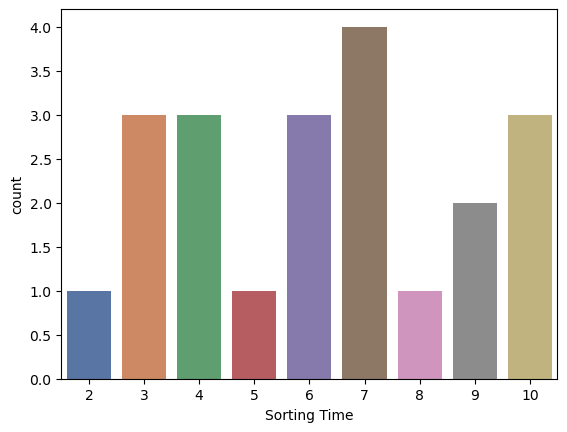

In [176]:
sns.countplot(data=df,x='Sorting Time',palette='deep')
plt.show()

In [177]:
## Inference - Sorting time 7 is occur max times so maximum number of sorting is at 7.

# Feature Engineering and machine learing model

In [178]:
## dataset is having one input to predit output & linear plot is straight, so we will build simple linear regression  model.

In [179]:
## importing scikit library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [180]:
## set input and output of dataset
## x - independent varibale i.e delivery time
## y - dependent variable i.e sorting time

y=df['Delivery Time']
x=df['Sorting Time']

In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1234)

In [182]:
x_train.shape,y_train.shape

((16,), (16,))

In [183]:
x_test.shape,y_test.shape

((5,), (5,))

In [184]:
x_train=x_train.values.reshape(-1,1)
y_train=y_train.values.reshape(-1,1)
x_test=x_test.values.reshape(-1,1)

In [185]:
lr_model=LinearRegression()

In [186]:
lr_model_fit=lr_model.fit(x_train,y_train)

In [187]:
## intercept of model
print(lr_model_fit.intercept_)

[6.66384615]


In [188]:
## coef of model
print(lr_model_fit.coef_)

[[1.60153846]]


In [189]:
y_pred=lr_model_fit.predict(x_test)

In [190]:
df_y_pred=pd.DataFrame(y_pred,columns=['pred'])

In [191]:
df_y_pred['actual']=y_test.values

In [192]:
print(df_y_pred)

        pred  actual
0  21.077692   24.00
1  11.468462   11.50
2  16.273077   19.75
3  16.273077   13.75
4  11.468462   12.03


In [193]:
r2_score(df_y_pred['pred'],df_y_pred['actual'])

0.577463605342888

In [194]:
## r2_score is 0.57, so build model is towards 1 so it is good model.

In [195]:
mean_absolute_error(df_y_pred['pred'],df_y_pred['actual'])

1.9030769230769233

In [196]:
mean_squared_error(df_y_pred['pred'],df_y_pred['actual'])

5.462222721893498

In [197]:
from math import sqrt

In [198]:
sqrt(mean_squared_error(df_y_pred['pred'],df_y_pred['actual']))

2.3371398592924426

In [199]:
## save the model
import joblib

In [200]:
file='delivery_sorting_lrmodel.sav'
joblib.dump(lr_model_fit,file)

['delivery_sorting_lrmodel.sav']

In [201]:
## load the model
loaded_model=joblib.load(file)
print(loaded_model)

LinearRegression()


In [202]:
y_pred_=loaded_model.predict(x_test)
y_pred_

array([[21.07769231],
       [11.46846154],
       [16.27307692],
       [16.27307692],
       [11.46846154]])

# Project insights and conclusion

In [203]:
# In above project we have dataset of delivery time and sorting time.
# It is observed that delivery time and sorting time is strongly correlate with each other.
# max delivery time is 29, min delivery time is 8, average delivery time is 17
# max sorting time is 10, min sorting time is 2, average sorting time is 6. max sorting time count is 7.
# Then i have build simple linear regression machine learning model to predit delivery time based on sorting time.
# model coefficient of determination is 0.57, so model is good.